# Упражнение 08 : Сиборн

In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
con = sqlite3.connect('../data/checking-logs.sqlite')

* анализируйте только пользователей, а не администраторов
* учитывайте только логи из table checker, где статус готов
* вы можете выбрать ту палитру, которая вам нравится
* ширина линии должна быть равна 3
* фон графика серый
* высота должна быть 10, а ширина должна быть в 1,5 раза больше высоты
* размер шрифта заголовка должен быть 30
* размер шрифта надписей axises равен 15

In [ ]:
sql = '''
SELECT uid, numTrials, timestamp
FROM checker
WHERE uid LIKE 'user_%'
AND status='ready'
AND labname='project1'
ORDER BY uid
'''
commits = pd.read_sql(sql, con, parse_dates=['timestamp'])
commits.sort_values(by='timestamp')

,uid,numTrials,timestamp
777,user_4,1,2020-04-17 05:19:02.744528
778,user_4,2,2020-04-17 05:22:45.549397
779,user_4,3,2020-04-17 05:34:24.422370
780,user_4,4,2020-04-17 05:43:27.773992
781,user_4,5,2020-04-17 05:46:32.275104
...,...,...,...
278,user_19,26,2020-05-15 10:22:39.698523
279,user_19,27,2020-05-15 10:22:46.248162
280,user_19,28,2020-05-15 10:23:18.043212
656,user_28,27,2020-05-15 10:38:14.430013


Text(0.5, 0.98, 'Dynamic of commits per user in project1')

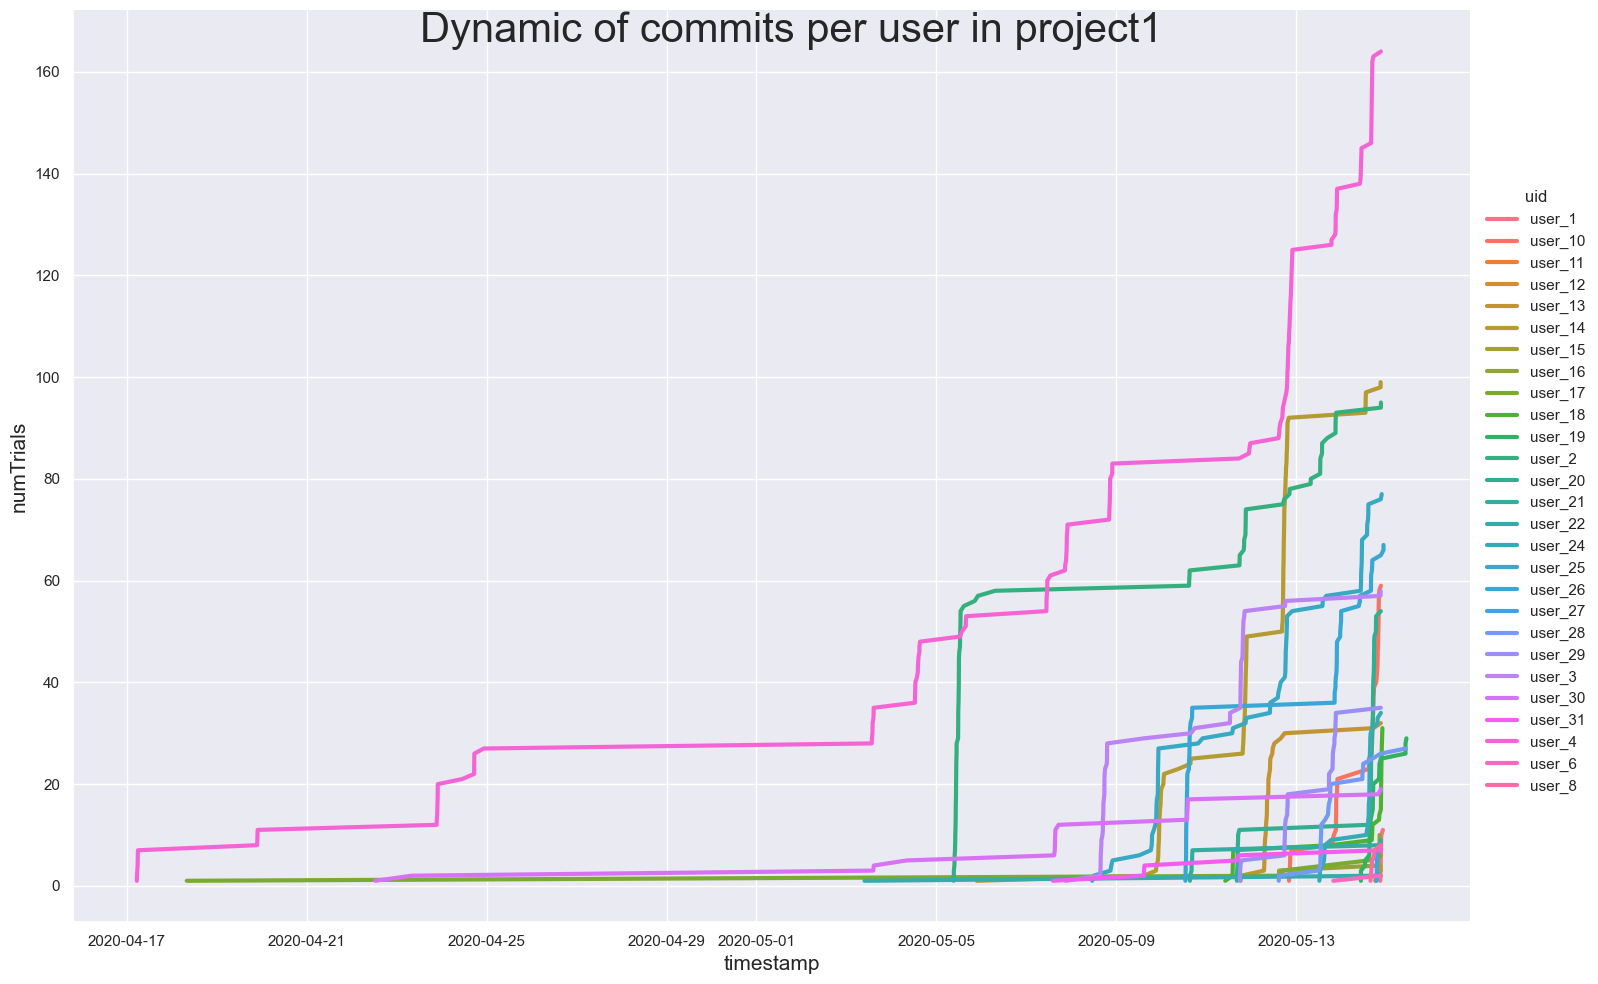

In [6]:
sns.set_theme(palette='dark',
        rc={'axes.labelsize': 15,
            'lines.linewidth': 3})
sns.relplot(data=commits,
            x='timestamp',
            y='numTrials',
            legend='full',
            hue='uid',
            kind='line',
            height=10,
            aspect=1.5)
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)

In [7]:
con.close()

# в конце вашего блокнота Jupyter создайте ячейку с кодом и вставьте вопросы (ответьте на них, глядя только на графики):

* «Какой пользователь почти всё время лидировал по количеству коммитов?» Ответ: пользователь_*.

user_4

* «Какой пользователь был лидером лишь в течение короткого периода времени?» Ответ: пользователь_*.

user_2